In [ ]:
# https://www.kaggle.com/datasets/roopacalistus/superstore
# https://www.kaggle.com/datasets/open-flights/flight-route-database/data


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

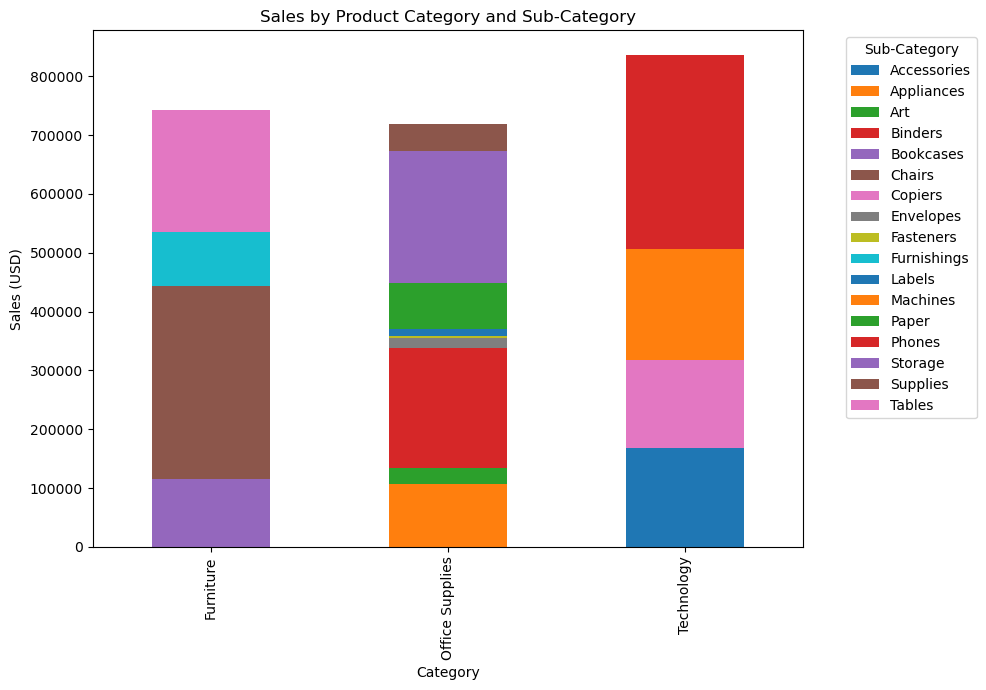

In [5]:
path = r"C:\Users\Selu\Desktop\SampleSuperstore.csv"  

df = pd.read_csv(path)

# print(df.head())

grouped = df.groupby(['Category', 'Sub-Category']).sum()['Sales'].unstack()

grouped.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title('Sales by Product Category and Sub-Category')
plt.xlabel('Category')
plt.ylabel('Sales (USD)')
plt.legend(title='Sub-Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [7]:
# pip install geopandas folium
import folium
from folium.plugins import AntPath

path2 = r"C:\Users\Selu\Desktop\2018_Flights.csv"  

data = pd.read_csv(path2)

In [15]:
import folium
from folium.plugins import MarkerCluster

map = folium.Map(location=[20, 0], tiles='cartodbpositron', zoom_start=2)

marker_cluster = MarkerCluster().add_to(map)

for idx, row in data.iterrows():
    origin = [row['Origin_Latitude'], row['Origin_Longitude']]
    destination = [row['Dest_Latitude'], row['Dest_Longitude']]
    line = folium.PolyLine(locations=[origin, destination], weight=1, color='blue')
    map.add_child(line)

    folium.Marker(
        location=origin,
        popup=f"{row['Origin']}",
        icon=folium.Icon(color='red', icon='info-sign')
    ).add_to(marker_cluster)
    
    folium.Marker(
        location=destination,
        popup=f"{row['Dest']}",
        icon=folium.Icon(color='green', icon='info-sign')
    ).add_to(marker_cluster)

# Guardar el mapa en un archivo HTML
map_path = "C:/Users/Selu/Desktop/Flight_Routes_Map.html" 
map.save(map_path)
print("Map saved at:", map_path)

Map saved at: C:/Users/Selu/Desktop/Flight_Routes_Map.html
